In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

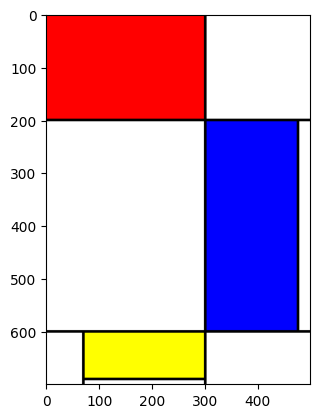

In [2]:
color_img = np.zeros((700, 500, 3), dtype = np.uint8)
color_img[:,:,:] = 255
cv2.rectangle(color_img, (0,0), (300,200), (255,0,0), -1)

cv2.rectangle(color_img, (300,200), (475,600), (0,0,255), -1)

cv2.rectangle(color_img, (70,600), (300,690), (255,255,0), -1)

cv2.line(color_img, (300,0),(300,700),(0,0,0), 3)
cv2.line(color_img, (475,200),(475,600),(0,0,0), 3)

cv2.line(color_img, (0,200),(500,200),(0,0,0), 3)

cv2.line(color_img, (0,600),(500,600),(0,0,0),3)
cv2.line(color_img, (70,600),(70,700),(0,0,0),3)
cv2.line(color_img, (70,690),(300,690),(0,0,0),3)

plt.imshow(color_img) 
plt.show()


In [3]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        #Concateamos en horizontal los tres planos del fotograma

        b = 50 -b
        collage = np.hstack((r, g, b))
    
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

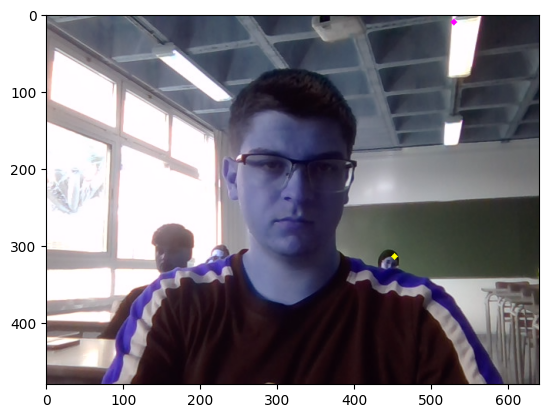

In [4]:
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

vid = cv2.VideoCapture(0)



# # Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1
    
# # fotograma a fotograma
ret, frame = vid.read()

img_gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

maxColor, minColor, maxPos, minPos = cv2.minMaxLoc(img_gris)
# print(maxPos)
# print(minPos)
cv2.circle(frame, maxPos, 2, (255,255,0), 3 )
cv2.circle(frame, minPos, 2,(255,0,255), 3 )

if ret: 
       # Activa el manejador en el primer fotograma
    if lanzado == 0:
#         # Muestra fotograma
        cv2.imshow('Cam', frame)   
        # Define el nombre del manejador del evento
        cv2.setMouseCallback('Cam', mouse_events)
        lanzado = 1
        
#     # Muestra valores RGB intentando centrar en el puntero
    if px > -1:
        cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
        cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
        cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)

cv2.imshow('Cam', frame)

plt.imshow(frame)
plt.show()

# Detenemos pulsado ESC
#if cv2.waitKey(20) == 27:
  
# Libera el objeto de captura
#vid.release()
# Destruye ventanas
#cv2.destroyAllWindows()

In [5]:

vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/4)
h=int(h/4)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
# Imagen conjunta 4x4
collage = np.zeros((h*4, w*4, 3), dtype=np.uint8)

# Primera fila
c00 = collage[0:h, 0:w]
c01 = collage[0:h, w:2*w]
c02 = collage[0:h, 2*w:3*w]
c03 = collage[0:h, 3*w:4*w]

# Segunda fila
c10 = collage[h:2*h, 0:w]
c11 = collage[h:2*h, w:2*w]
c12 = collage[h:2*h, 2*w:3*w]
c13 = collage[h:2*h, 3*w:4*w]

# Tercera fila
c20 = collage[2*h:3*h, 0:w]
c21 = collage[2*h:3*h, w:2*w]
c22 = collage[2*h:3*h, 2*w:3*w]
c23 = collage[2*h:3*h, 3*w:4*w]

# Cuarta fila
c30 = collage[3*h:4*h, 0:w]
c31 = collage[3*h:4*h, w:2*w]
c32 = collage[3*h:4*h, 2*w:3*w]
c33 = collage[3*h:4*h, 3*w:4*w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

# #         #Jugamos con los valores de los planos
# #         #tl[:,:,0] = b
# #         #tl[:,:,1] = g
# #         #tl[:,:,2] = r

# #         #tr[:,:,0] = 255 - r
# #         #tr[:,:,1] = g
# #         #tr[:,:,2] = b
        
# #         #bl[:,:,0] = r
# #         #bl[:,:,1] = 255 - b
# #         #bl[:,:,2] = g

# #         #br[:,:,0] = b
# #         #br[:,:,1] = g
# #         #br[:,:,2] = 255 - r
        c00[:,:,:] = frame 
        c01[:,:,0] = 255 -r
        c01[:,:,1] = g
        c01[:,:,2] = b 
        
        #c01[:,:,:] = frame
        c02[:,:,:] = frame
        c03[:,:,:] = frame

        c10[:,:,:] = frame
        c10[:,:,0] = b
        c10[:,:,1] = g
        c10[:,:,2] = 255-r


        c11[:,:,:] = frame
        c12[:,:,:] = frame
        c13[:,:,:] = frame

        c20[:,:,] = frame
        c21[:,:,] = frame
        c22[:,:,] = frame
        c23[:,:,:] = frame

        c30[:,:,:] = frame
        c31[:,:,:] = frame
        c32[:,:,:] = frame
        c33[:,:,:] = frame   
    
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
         break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

IndexError: index 124 is out of bounds for axis 0 with size 120

IndexError: index 153 is out of bounds for axis 0 with size 120

IndexError: index 153 is out of bounds for axis 0 with size 120

IndexError: index 138 is out of bounds for axis 0 with size 120

IndexError: index 261 is out of bounds for axis 1 with size 160

IndexError: index 259 is out of bounds for axis 1 with size 160

IndexError: index 259 is out of bounds for axis 1 with size 160

IndexError: index 259 is out of bounds for axis 1 with size 160

IndexError: index 120 is out of bounds for axis 0 with size 120

IndexError: index 141 is out of bounds for axis 0 with size 120

IndexError: index 144 is out of bounds for axis 0 with size 120

IndexError: index 145 is out of bounds for axis 0 with size 120

IndexError: index 153 is out of bounds for axis 0 with size 120

IndexError: index 179 is out of bounds for axis 0 with size 120

IndexError: index 182 is out of bounds for axis 0 with size 120

IndexError: index 166 is out of bounds for axis 0 with size 120

IndexError: index 156 is out of bounds for axis 0 with size 120

IndexError: index 155 is out of bounds for axis 0 with size 120

IndexError: index 155 is out of bounds for axis 0 with size 120

IndexError: index 157 is out of bounds for axis 0 with size 120

IndexError: index 158 is out of bounds for axis 0 with size 120

IndexError: index 158 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 159 is out of bounds for axis 0 with size 120

IndexError: index 160 is out of bounds for axis 0 with size 120

IndexError: index 163 is out of bounds for axis 0 with size 120

IndexError: index 169 is out of bounds for axis 0 with size 120

IndexError: index 180 is out of bounds for axis 0 with size 120

IndexError: index 204 is out of bounds for axis 0 with size 120

IndexError: index 208 is out of bounds for axis 0 with size 120

IndexError: index 197 is out of bounds for axis 0 with size 120

IndexError: index 196 is out of bounds for axis 0 with size 120

IndexError: index 196 is out of bounds for axis 0 with size 120

IndexError: index 198 is out of bounds for axis 0 with size 120

IndexError: index 207 is out of bounds for axis 0 with size 120

IndexError: index 212 is out of bounds for axis 0 with size 120

IndexError: index 212 is out of bounds for axis 0 with size 120

IndexError: index 212 is out of bounds for axis 0 with size 120

IndexError: index 212 is out of bounds for axis 0 with size 120

IndexError: index 212 is out of bounds for axis 0 with size 120

IndexError: index 212 is out of bounds for axis 0 with size 120